In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_wine

# Carregar o conjunto de dados Wine
wine = load_wine()
X, y = wine.data, wine.target

# Criar DataFrame para facilitar a manipulação dos dados
columns = [f"feature_{i}" for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=columns)
df['target'] = y

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM
svm = SVC(kernel="linear", C=1)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Acurácia do SVM:", accuracy_svm)

# MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Acurácia do MLP:", accuracy_mlp)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Acurácia do KNN:", accuracy_knn)

# Matriz de Confusão e Relatório de Classificação para SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Matriz de Confusão (SVM):\n", conf_matrix_svm)
class_report_svm = classification_report(y_test, y_pred_svm)
print("Relatório de Classificação (SVM):\n", class_report_svm)

# Matriz de Confusão e Relatório de Classificação para MLP
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
print("Matriz de Confusão (MLP):\n", conf_matrix_mlp)
class_report_mlp = classification_report(y_test, y_pred_mlp)
print("Relatório de Classificação (MLP):\n", class_report_mlp)

# Matriz de Confusão e Relatório de Classificação para KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Matriz de Confusão (KNN):\n", conf_matrix_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
print("Relatório de Classificação (KNN):\n", class_report_knn)


Acurácia do SVM: 0.9722222222222222
Acurácia do MLP: 1.0
Acurácia do KNN: 0.9444444444444444
Matriz de Confusão (SVM):
 [[14  0  0]
 [ 0 13  1]
 [ 0  0  8]]
Relatório de Classificação (SVM):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36

Matriz de Confusão (MLP):
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
Relatório de Classificação (MLP):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
we

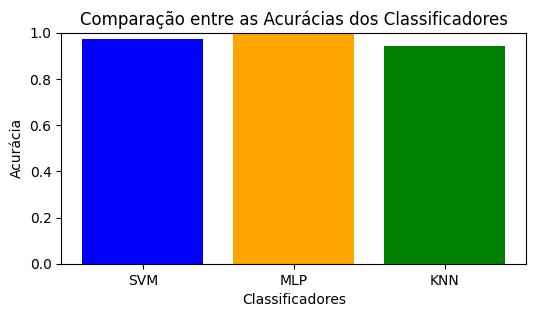

In [30]:
# Acurácias dos classificadores
accuracies = [accuracy_svm, accuracy_mlp, accuracy_knn]
classifiers = ['SVM', 'MLP', 'KNN']

# Criar o gráfico de barras
plt.figure(figsize=(6, 3))
plt.bar(classifiers, accuracies, color=['blue', 'orange', 'green'])
plt.title('Comparação entre as Acurácias dos Classificadores')
plt.xlabel('Classificadores')
plt.ylabel('Acurácia')
plt.ylim(0, 1)  # Define o limite do eixo y de 0 a 1 (intervalo de acurácia)
plt.show()

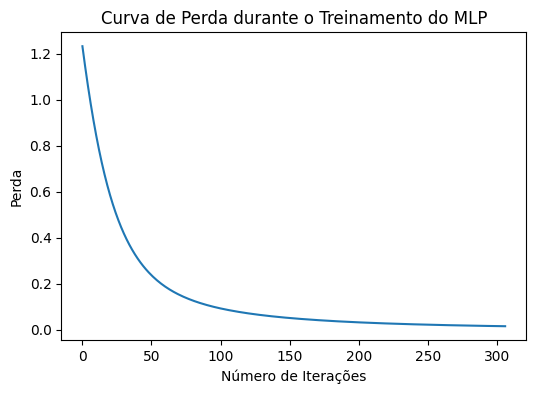

In [35]:
plt.figure(figsize=(6, 4))
plt.plot(mlp.loss_curve_)
plt.title("Curva de Perda durante o Treinamento do MLP")
plt.xlabel("Número de Iterações")
plt.ylabel("Perda")
plt.savefig('curva_treinamento_MLP.pdf')
plt.show()

['Class 0', 'Class 1', 'Class 2']


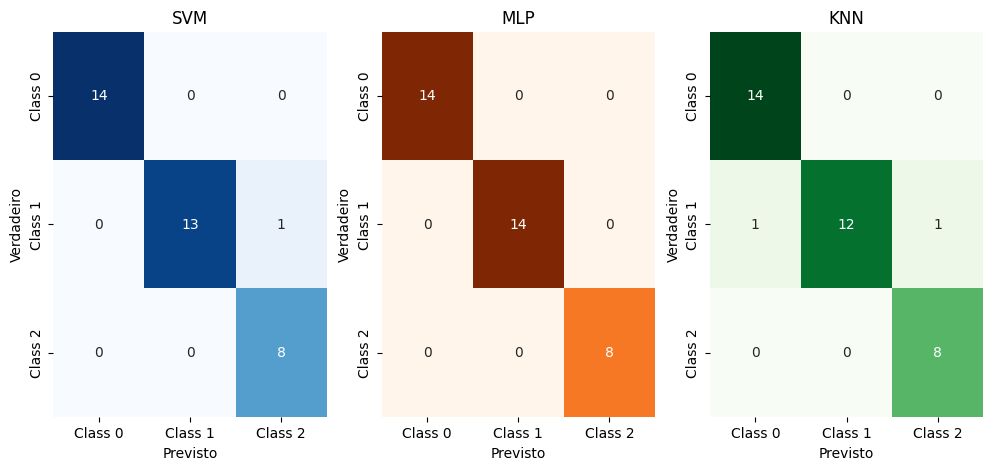

In [39]:
# Nomes das classes
class_names = [f'Class {i}' for i in range(len(set(y_test)))]

print(class_names)

# Configurar subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Matriz de Confusão - SVM
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axs[0], xticklabels=class_names, yticklabels=class_names)
axs[0].set_title('SVM')
axs[0].set_xlabel('Previsto')
axs[0].set_ylabel('Verdadeiro')

# Matriz de Confusão - MLP
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Oranges', cbar=False, ax=axs[1], xticklabels=class_names, yticklabels=class_names)
axs[1].set_title('MLP')
axs[1].set_xlabel('Previsto')
axs[1].set_ylabel('Verdadeiro')

# Matriz de Confusão - KNN
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axs[2], xticklabels=class_names, yticklabels=class_names)
axs[2].set_title('KNN')
axs[2].set_xlabel('Previsto')
axs[2].set_ylabel('Verdadeiro')

plt.show()